Main Imports:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("./Life Expectancy Data.csv")

In [5]:
df = df.dropna()
# smaller = df.loc[:, ["Status", "Hepatitis B", "Polio", "Measles ", " BMI ", "Diphtheria ", " HIV/AIDS"]]
X = np.c_[df["Hepatitis B"], df["Polio"], df["Measles "], df[" BMI "], df["Diphtheria "], df[" HIV/AIDS"]]
y = np.array(df["Status"])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

2.1

1.0
0.8697247706422019
|--- feature_3 <= 52.85
|   |--- feature_3 <= 7.00
|   |   |--- feature_3 <= 5.85
|   |   |   |--- feature_0 <= 60.50
|   |   |   |   |--- feature_3 <= 4.75
|   |   |   |   |   |--- class: Developing
|   |   |   |   |--- feature_3 >  4.75
|   |   |   |   |   |--- feature_0 <= 26.50
|   |   |   |   |   |   |--- class: Developing
|   |   |   |   |   |--- feature_0 >  26.50
|   |   |   |   |   |   |--- class: Developed
|   |   |   |--- feature_0 >  60.50
|   |   |   |   |--- class: Developing
|   |   |--- feature_3 >  5.85
|   |   |   |--- feature_4 <= 91.50
|   |   |   |   |--- class: Developing
|   |   |   |--- feature_4 >  91.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_4 <= 96.50
|   |   |   |   |   |   |--- class: Developing
|   |   |   |   |   |--- feature_4 >  96.50
|   |   |   |   |   |   |--- feature_0 <= 96.00
|   |   |   |   |   |   |   |--- class: Developed
|   |   |   |   |   |   |--- feature_0 >  96.00
|   |   |   |   |   

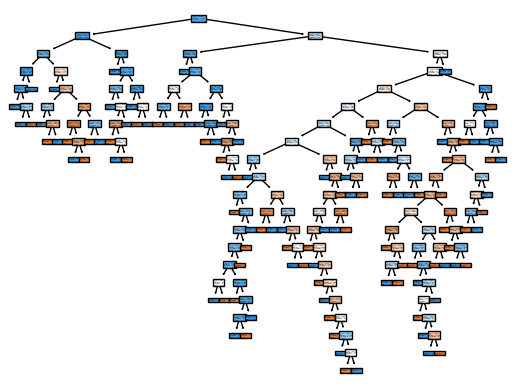

In [9]:
clf1 = tree.DecisionTreeClassifier(criterion="entropy")
clf1.fit(X_train, y_train)
y_predict = clf1.predict(X_train)
print(accuracy_score(y_train, y_predict))
y_predict = clf1.predict(X_test)
print(accuracy_score(y_test, y_predict))

ret = tree.plot_tree(clf1, filled=True)
print(tree.export_text(clf1))

2.2

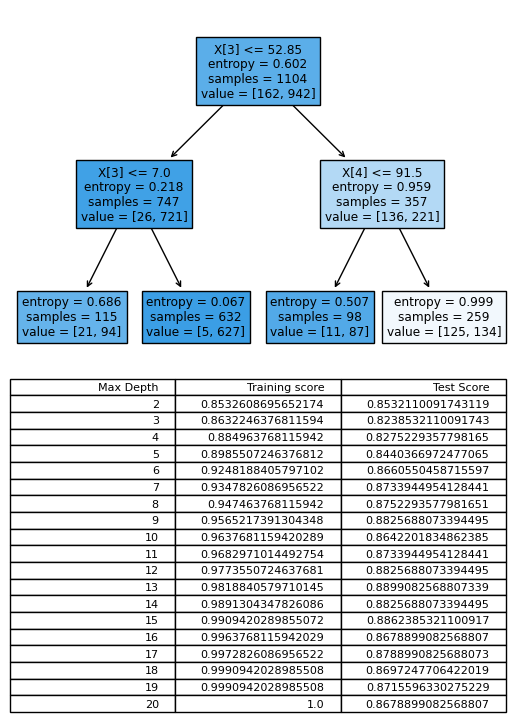

In [21]:
table_info = [["Max Depth", "Training score", "Test Score"]]
pH = 0

for i in range(2, 21):
    clf2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=i)
    clf2.fit(X_train, y_train)
    y_predict = clf2.predict(X_train)
    pH = y_predict
    # print("Max Depth: ", i, "   ", accuracy_score(y_train, y_predict))
    y_predict = clf2.predict(X_test)
    table_info.append([i, accuracy_score(y_train, pH), accuracy_score(y_test, y_predict)])
    # print(accuracy_score(y_test, y_predict))
    if(i == 2):
        ret = tree.plot_tree(clf2, filled=True)



plt.table(table_info)
plt.axis('off')
plt.show()

2.3
No Code for this section, decision tree print is included in the last section

2.4

In [ ]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=13)
clf3.fit(X_train, y_train)
y_predict = clf3.predict(X_train)
print("Training Matrix:")
print(confusion_matrix(y_train, clf3.predict(X_train)))


y_predict = clf3.predict(X_test)
print("Test Matrix:")
print(confusion_matrix(y_test, clf3.predict(X_test)))

2.5

In [10]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=2)
clf5 = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf=10, min_samples_split=30)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

print("2 min split")
y_predict = clf4.predict(X_train)
print("Training: ", accuracy_score(y_train, y_predict))
y_predict = clf4.predict(X_test)
print("Testing: ", accuracy_score(y_test, y_predict))
print("30 min split")
y_predict = clf5.predict(X_train)
print("Training: ", accuracy_score(y_train, y_predict))
y_predict = clf5.predict(X_test)
print("Testing: ", accuracy_score(y_test, y_predict))


2 min split
Training:  0.9184782608695652
Testing:  0.8513761467889909
30 min split
Training:  0.9148550724637681
Testing:  0.8532110091743119
